---
#load packages and modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import MangroveConservation.get_twitter_data as getTwitterdata
import MangroveConservation.clean_text as clean
#import MangroveConservation.network_analysis as network
import MangroveConservation.sentiment_analaysis as sentiment

help(getTwitterdata.get_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
---

#lint score

In [ ]:
#linting
!pylint get_twitter_data.py

In [ ]:
---
#collect twitter data


In [ ]:
###get twitter data and save it into the directory

#code is not working to combine the search terms, date and csv file
#search_term = '(mangrove ecosystem)OR(mangrove forest)'
#search_location = 'CN'
#SEARCH_TERM = search_term+' lang:en'+' place:'+search_location


SEARCH_TERM='mangrove'
start_time ="201901010000"
end_time="201906190000"
file_name='test.csv'

key = 'i2uWM8Fvt36ipy3pEXk5Cy7ue'
secret = 'FKZBP7QjykINzuAJPVaEsO5l106xd939lmNmXoWQhl0Arqhpzz'
access_token = '2972155805-8lMqqpd1NQR8yXPcMZHEupJLa0UID36VO1ggwVF'
access_token_secret = 'Anw4LVzCi6AxxvZSZVKIwbthEDigUKSCgmuwgCpdPhGk4'


#file_name = 'mangrove_twitters_'+search_location +start_time+end_time+'.csv'
#getTwitterdata.get_data(SEARCH_TERM,key,secret,access_token,access_token_secret,start_time,end_time,file_name)


In [ ]:
---

# exploratory analysis

## collect the most fewquent words/phrases and graph wordcloud map

In [59]:
tweets = clean.ImportTweet("mangrove1.csv")
tweets.head()

,time,follower_count,id,name,user_description,tweet,user_joined,user_location
0,2019-12-30 16:11:32+00:00,382,1211756730616561670,Nach not Notch,i like food,I might regret this in more than one way For t...,2011,"Los Angeles, CA"
1,2019-12-30 15:11:45+00:00,19259,1211741686612709376,NAIDU,Be Don t Try To Become,India State of Forest Report ISFR2019 Mangrove...,2012,Hyderabad Telangana India 🇮🇳
2,2019-12-30 13:01:01+00:00,363,1211708784902623232,Shwetal Shah,Technical Adviser Dept of Climate Change Gujar...,Government of India released Forest report 201...,2011,India
3,2019-12-30 12:40:59+00:00,0,1211703743907008513,vinay shreshtha,,JOURNEY ABOUT TO START FOR THE MANGROVE FOREST,2010,"पश्चिम बंगाल, भारत"
4,2019-12-30 12:24:12+00:00,0,1211699521865965568,vinay shreshtha,,ABOUT TO ENTER BICHITRAPUR MANGROVE FOREST ODISHA,2010,"पश्चिम बंगाल, भारत"


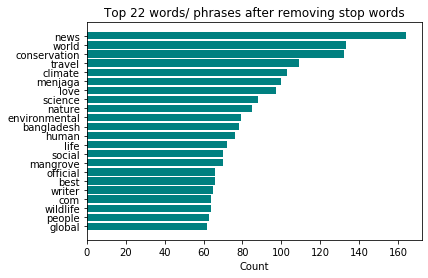

In [55]:
sentiment.PlotTopWords(tweets["user_description"],22,1,5)

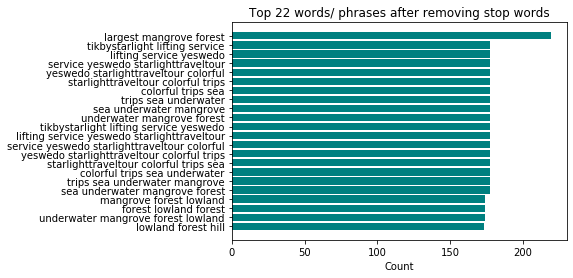

In [65]:
sentiment.PlotTopWords(tweets["tweet"],22,3,4)

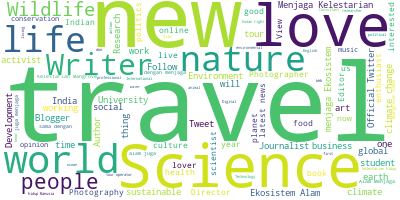

In [62]:
sentiment.PlotWordCloud(tweets['user_description'])

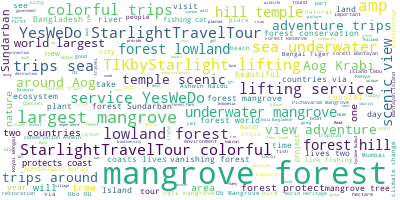

In [63]:
sentiment.PlotWordCloud(tweets['tweet'])

In [ ]:
---

#sentiment analysis

In [71]:
tweets["sentiment"]=sentiment.Sentiment(tweets["tweet"])
tweets.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,time,follower_count,id,name,user_description,tweet,user_joined,user_location,sentiment
0,2019-12-30 16:11:32+00:00,382,1211756730616561670,Nach not Notch,i like food,I might regret this in more than one way For t...,2011,"Los Angeles, CA",Positive
1,2019-12-30 15:11:45+00:00,19259,1211741686612709376,NAIDU,Be Don t Try To Become,India State of Forest Report ISFR2019 Mangrove...,2012,Hyderabad Telangana India 🇮🇳,Neutral
2,2019-12-30 13:01:01+00:00,363,1211708784902623232,Shwetal Shah,Technical Adviser Dept of Climate Change Gujar...,Government of India released Forest report 201...,2011,India,Positive
3,2019-12-30 12:40:59+00:00,0,1211703743907008513,vinay shreshtha,,JOURNEY ABOUT TO START FOR THE MANGROVE FOREST,2010,"पश्चिम बंगाल, भारत",Neutral
4,2019-12-30 12:24:12+00:00,0,1211699521865965568,vinay shreshtha,,ABOUT TO ENTER BICHITRAPUR MANGROVE FOREST ODISHA,2010,"पश्चिम बंगाल, भारत",Neutral


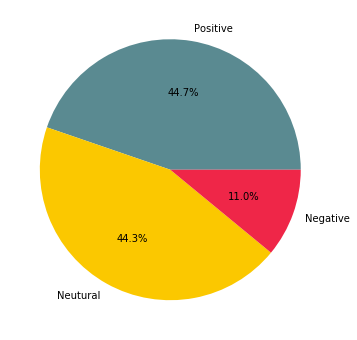

In [73]:
sentiment.PlotSentiment(tweets["sentiment"])